In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

# Reading the Dataset

In [75]:
df = pd.read_csv('Trials.csv')

In [76]:
df.head(5)

,id,name,screen_name,fav_number,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,...,profile_sidebar_fill_color,profile_background_image_url,profile_background_color,profile_link_color,utc_offset,protected,verified,description,updated,dataset
0,3610511,Davide Dellacasa,braddd,0,20370,5470,2385,145,52,Fri Apr 06 10:58:22 +0000 2007,...,FFF7CC,http://a0.twimg.com/profile_background_images/...,BADFCD,FF0000,3600.0,NaN,NaN,Founder of http://www.screenweek.it & http://w...,2/14/2015 10:54,1
1,5656162,Simone Economo,eKoeS,68,3131,506,381,9,40,Mon Apr 30 15:08:42 +0000 2007,...,DDEEF6,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,3600.0,NaN,NaN,BSc degree (cum laude) in Computer Engineering...,2/14/2015 10:54,1
2,5682702,tacone,tacone_,7696,4024,264,87,323,16,Tue May 01 11:53:40 +0000 2007,...,0,http://a0.twimg.com/profile_background_images/...,1A1B1F,2FC2EF,3600.0,NaN,NaN,Cogito ergo bestemmio.,2/14/2015 10:54,1
3,6067292,alesaura,alesstar,202,40586,640,622,1118,32,Tue May 15 16:55:16 +0000 2007,...,95E8EC,http://a0.twimg.com/images/themes/theme4/bg.gif,0099B9,0099B9,3600.0,NaN,NaN,"Se la vita ti dà sarde, scapocciale!",2/14/2015 10:54,1
4,6015122,Angelo,PerDiletto,37318,2016,62,64,13,0,Sun May 13 19:52:00 +0000 2007,...,F6F6F6,http://a0.twimg.com/images/themes/theme18/bg.gif,ACDED6,38543,3600.0,NaN,NaN,Je me souviens,2/14/2015 10:54,1


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2818 entries, 0 to 2817
Data columns (total 35 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  2818 non-null   int64  
 1   name                                2818 non-null   object 
 2   screen_name                         2818 non-null   object 
 3   fav_number                          2818 non-null   int64  
 4   statuses_count                      2818 non-null   int64  
 5   followers_count                     2818 non-null   int64  
 6   friends_count                       2818 non-null   int64  
 7   favourites_count                    2818 non-null   int64  
 8   listed_count                        2818 non-null   int64  
 9   created_at                          2818 non-null   object 
 10  url                                 463 non-null    object 
 11  lang                                2818 no

# Columns to drop

In [78]:
cols_to_drop = ['id', 'url', 'lang', 'time_zone', 'location', 'default_profile',
       'default_profile_image', 'geo_enabled', 'profile_image_url',
       'profile_banner_url', 'profile_use_background_image',
       'profile_background_image_url_https', 'profile_text_color',
       'profile_image_url_https', 'profile_sidebar_border_color',
       'profile_background_tile', 'profile_sidebar_fill_color',
       'profile_background_image_url', 'profile_background_color',
       'profile_link_color', 'utc_offset', 'protected', 'verified',
       'description', 'updated']

In [79]:
df = df.drop(cols_to_drop,axis=1)

In [80]:
df.head(2)

,name,screen_name,fav_number,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,dataset
0,Davide Dellacasa,braddd,0,20370,5470,2385,145,52,Fri Apr 06 10:58:22 +0000 2007,1
1,Simone Economo,eKoeS,68,3131,506,381,9,40,Mon Apr 30 15:08:42 +0000 2007,1


# Potting using Seaborn

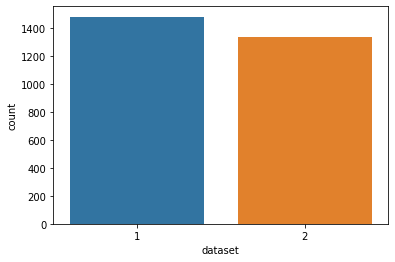

In [81]:
sns.countplot(x='dataset',data = df)

In [82]:
sns.countplot(x='dataset', hue = 'lang', data = df)

ValueError: Could not interpret input 'lang'

# Heat Map

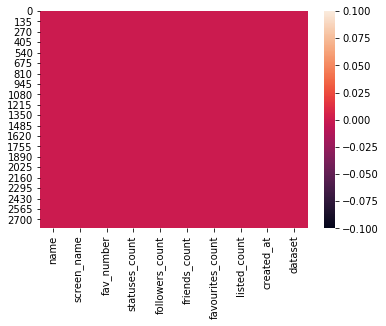

In [83]:
sns.heatmap(df.isnull())

# Date Time Separation

In [84]:
df['created_at'] = pd.to_datetime(df.created_at)

In [85]:
df['Year'] = df.created_at.dt.year

In [86]:
df['Month'] = df.created_at.dt.month

In [87]:
df['Time'] = df.created_at.dt.time

In [88]:
df.head(2)

,name,screen_name,fav_number,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,dataset,Year,Month,Time
0,Davide Dellacasa,braddd,0,20370,5470,2385,145,52,2007-04-06 10:58:22+00:00,1,2007,4,10:58:22
1,Simone Economo,eKoeS,68,3131,506,381,9,40,2007-04-30 15:08:42+00:00,1,2007,4,15:08:42


In [89]:
df.dtypes

name                             object
screen_name                      object
fav_number                        int64
statuses_count                    int64
followers_count                   int64
friends_count                     int64
favourites_count                  int64
listed_count                      int64
created_at          datetime64[ns, UTC]
dataset                           int64
Year                              int64
Month                             int64
Time                             object
dtype: object

In [90]:
df.shape

(2818, 13)

In [91]:
df.size

36634

In [92]:
df.count()

name                2818
screen_name         2818
fav_number          2818
statuses_count      2818
followers_count     2818
friends_count       2818
favourites_count    2818
listed_count        2818
created_at          2818
dataset             2818
Year                2818
Month               2818
Time                2818
dtype: int64

In [93]:
df['dataset'].value_counts()

1    1481
2    1337
Name: dataset, dtype: int64

In [94]:
real_df = df[df['dataset']==1][0:200]
fake_df = df[df['dataset']==2][0:200]

# Label Encoding

In [95]:
from sklearn import preprocessing 

In [96]:
le = preprocessing.LabelEncoder()

In [97]:
le.fit(df['screen_name'])

LabelEncoder()

In [98]:
df['screen_name'] = le.transform(df['screen_name'])

In [99]:
le = preprocessing.LabelEncoder()

In [100]:
le.fit(df['name'])

LabelEncoder()

In [101]:
df['name'] = le.transform(df['name'])

In [102]:
le = preprocessing.LabelEncoder()

In [103]:
le.fit(df['Time'])

LabelEncoder()

In [104]:
df['Time']= le.transform(df['Time'])

In [105]:
df.dtypes

name                              int32
screen_name                       int32
fav_number                        int64
statuses_count                    int64
followers_count                   int64
friends_count                     int64
favourites_count                  int64
listed_count                      int64
created_at          datetime64[ns, UTC]
dataset                           int64
Year                              int64
Month                             int64
Time                              int32
dtype: object

# Feature Engineering 

In [106]:
df.columns

Index(['name', 'screen_name', 'fav_number', 'statuses_count',
       'followers_count', 'friends_count', 'favourites_count', 'listed_count',
       'created_at', 'dataset', 'Year', 'Month', 'Time'],
      dtype='object')

In [149]:
feature_df = df[['screen_name', 'fav_number', 'statuses_count',
       'followers_count', 'friends_count', 'favourites_count', 'listed_count',
       'dataset', 'Year', 'Month', 'Time']]

In [150]:
feature_df.dtypes

screen_name         int32
fav_number          int64
statuses_count      int64
followers_count     int64
friends_count       int64
favourites_count    int64
listed_count        int64
dataset             int64
Year                int64
Month               int64
Time                int32
dtype: object

In [151]:
X = np.asarray(feature_df)

In [152]:
y = np.asarray(df['dataset'])

In [153]:
X[0:6]

array([[ 1106,     0, 20370,  5470,  2385,   145,    52,     1,  2007,
            4,   763],
       [ 1409,    68,  3131,   506,   381,     9,    40,     1,  2007,
            4,  1282],
       [ 2626,  7696,  4024,   264,    87,   323,    16,     1,  2007,
            5,   872],
       [  942,   202, 40586,   640,   622,  1118,    32,     1,  2007,
            5,  1880],
       [  680, 37318,  2016,    62,    64,    13,     0,     1,  2007,
            5,  2257],
       [ 1291,  3901,  3603,   138,   179,    53,     1,     1,  2007,
            5,  1299]], dtype=int64)

# Train Test Split

In [154]:
from sklearn.model_selection import train_test_split

In [155]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 4)

In [156]:
X_train.shape

(2254, 11)

In [157]:
y_train.shape

(2254,)

In [158]:
X_test.shape

(564, 11)

In [159]:
y_test.shape

(564,)

# Logistik Regression

In [160]:
from sklearn.linear_model import LogisticRegression

In [161]:
logmodel = LogisticRegression()

In [162]:
logmodel.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [163]:
y_predict = logmodel.predict(X_test)

# Classificaiton and Accuracy Report

In [164]:
from sklearn.metrics import classification_report

In [165]:
classification_report(y_test,y_predict)

'              precision    recall  f1-score   support\n\n           1       1.00      0.99      0.99       298\n           2       0.99      1.00      0.99       266\n\n    accuracy                           0.99       564\n   macro avg       0.99      0.99      0.99       564\nweighted avg       0.99      0.99      0.99       564\n'

In [166]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_predict))
print(confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           1       1.00      0.99      0.99       298
           2       0.99      1.00      0.99       266

    accuracy                           0.99       564
   macro avg       0.99      0.99      0.99       564
weighted avg       0.99      0.99      0.99       564

[[294   4]
 [  1 265]]


In [167]:
print(y_predict)

[2 1 1 2 1 1 1 1 2 1 1 2 2 2 2 2 2 1 1 2 1 1 1 1 2 1 2 1 1 1 2 1 1 1 2 2 1
 1 2 2 1 1 1 2 1 2 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 2 1 2 1 1 1 2 1 2 2 2 1
 2 1 1 2 1 2 1 1 1 2 1 1 1 1 2 1 2 1 1 2 1 1 2 1 2 2 1 1 1 1 1 2 1 1 2 1 1
 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 1 1 2 2 2 2 1 2 1 1 1 2 1 1 2 1 1 2 2 1 1 2
 2 1 2 2 2 2 1 2 1 1 2 1 2 2 2 2 1 2 2 2 2 1 2 1 2 2 2 1 1 1 1 1 1 2 2 2 2
 2 1 2 2 2 2 2 1 1 1 1 1 1 1 1 2 1 1 1 2 1 2 2 1 1 2 2 1 1 2 2 1 1 2 1 2 2
 1 1 2 2 2 1 2 1 2 2 2 2 1 1 2 2 2 2 2 2 2 2 1 2 1 2 1 2 1 2 1 2 1 1 1 1 2
 1 2 1 2 2 2 1 2 1 1 2 1 2 2 2 2 2 1 2 1 2 1 1 1 1 1 2 1 2 1 2 2 1 2 2 1 2
 1 1 1 2 2 2 1 1 1 1 1 1 2 1 1 2 1 2 2 1 2 1 1 2 2 1 2 2 1 1 2 1 1 1 1 2 1
 2 1 2 2 2 2 2 1 2 1 1 1 1 1 1 1 2 1 2 2 1 2 2 2 2 1 1 2 1 2 1 1 2 1 2 1 1
 1 1 1 2 1 2 2 2 2 2 1 1 1 1 2 1 1 2 1 1 1 2 1 1 2 1 1 2 1 1 1 1 1 2 2 2 1
 2 1 2 1 2 2 2 2 2 1 2 2 2 2 1 2 1 2 1 1 1 1 1 1 1 2 1 2 1 1 1 2 2 2 1 2 1
 1 1 2 1 2 2 1 1 1 1 1 2 2 1 1 1 1 2 2 2 1 1 2 2 1 1 2 2 1 1 2 2 1 1 2 1 1
 1 2 2 2 1 2 1 1 1 1 2 1 

In [168]:
from sklearn.metrics import accuracy_score

In [169]:
print('Accuracy Score:', accuracy_score(y_test,y_predict))

Accuracy Score: 0.9911347517730497


In [72]:
print(y_predict)

[2 1 1 2 1 1 1 1 2 1 1 2 2 2 2 2 2 1 1 2 1 1 1 1 2 1 2 1 1 1 2 1 1 1 2 2 1
 1 2 2 1 1 1 2 1 2 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 2 1 2 1 1 1 2 1 2 2 2 1
 2 1 1 2 1 2 1 1 1 2 1 1 1 2 2 1 2 1 1 2 1 1 2 1 2 2 1 1 1 1 1 2 1 1 2 1 1
 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 1 1 2 2 2 2 1 2 1 1 1 2 1 1 2 1 1 2 2 1 1 2
 2 1 2 2 2 2 1 2 1 1 2 1 2 2 2 2 1 2 2 2 2 1 2 1 2 2 2 1 1 1 1 1 1 2 2 2 2
 2 1 2 2 2 2 2 1 1 1 1 1 1 1 1 2 1 1 2 2 1 2 2 1 1 2 2 1 1 2 2 1 1 2 1 2 2
 1 1 2 2 2 1 2 1 2 2 2 2 1 1 2 2 2 2 2 2 2 2 1 2 1 2 1 2 1 2 1 2 1 1 1 1 2
 1 2 1 2 2 2 1 2 1 1 2 1 2 2 2 2 2 1 2 1 2 1 1 1 1 1 2 1 2 1 2 2 1 2 2 1 2
 1 1 1 2 2 2 1 1 1 1 1 1 2 1 1 2 1 2 2 1 2 1 1 2 2 1 2 2 1 1 2 1 1 1 1 2 1
 2 1 2 2 2 2 2 1 2 1 1 1 1 1 1 1 2 1 2 2 1 2 2 2 2 1 1 2 1 2 1 1 2 1 2 1 1
 1 1 1 2 1 2 2 2 2 2 1 1 1 1 2 1 1 2 1 1 1 2 1 1 2 1 1 2 1 1 1 1 1 2 2 2 1
 2 1 2 1 2 2 2 2 2 1 2 2 2 2 1 2 1 2 1 1 1 1 1 1 1 2 1 2 1 1 1 2 2 2 1 2 1
 1 1 2 1 2 2 1 1 1 1 1 2 2 1 1 1 1 2 2 2 1 1 2 2 1 1 2 2 1 1 2 2 1 1 2 1 1
 1 2 2 2 1 2 1 1 1 1 2 1 

# Missing Value Interpolation

In [73]:
##df['Age'] = df['Age'].interpolate()

# Dropping Missing Value

In [ ]:
#df = df.dropna()

In [ ]:
#df.info()

# Creating dummy Columns for Categorical Variables

In [ ]:
#ecd = pd.get_dummies(df['Embarked'])
#sexcol = pd.get_dummies(df['sex'])

# Concatenating new dummy columns with the df dataframe

In [ ]:
#df = pd.concat((df,ecd,sexcol),axis=1)

# Deleting a sepcific column from the dataset

In [ ]:
X = dp.delete(X,1,axis) (Where 1 is the index value of the column)